# Introduction to Deep Learning

Deep learning allows computational models that are composed of multiple processing **layers** to learn representations of data with multiple levels of abstraction.

These methods have dramatically improved the state-of-the-art in speech recognition, visual object recognition, object detection and many other domains such as drug discovery and genomics. 

**Deep learning** is one of the leading tools in data analysis these days and one of the most common frameworks for deep learning is **Keras**. 

The Tutorial will provide an introduction to deep learning using `keras` with practical code examples.

# Artificial Neural Networks (ANN)

In machine learning and cognitive science, an artificial neural network (ANN) is a network inspired by biological neural networks which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown

An ANN is built from nodes (neurons) stacked in layers between the feature vector and the target vector. 

A node in a neural network is built from Weights and Activation function

An early version of ANN built from one node was called the **Perceptron**

<img src ="imgs/Perceptron.png" width="85%">

The Perceptron is an algorithm for supervised learning of binary classifiers. functions that can decide whether an input (represented by a vector of numbers) belongs to one class or another.

Much like logistic regression, the weights in a neural net are being multiplied by the input vertor summed up and feeded into the activation function's input.

A Perceptron Network can be designed to have *multiple layers*, leading to the **Multi-Layer Perceptron** (aka `MLP`)

<img src ="imgs/MLP.png" width="85%">
<img src="imgs/mlp_details.png" width="85%" />

The weights of each neuron are learned by **gradient descent**, where each neuron's error is derived with respect to it's weight.

Optimization is done for each layer with respect to the previous layer in a technique known as **BackPropagation**.

<img src ="imgs/backprop.png" width="80%">

# Softmax Classifier
$\mathbb p_k = \frac{e^{f_k}}{ \sum_j e^{f_j} } \hspace{1in} L_i =-\log\left(p_{y_i}\right)$

In [33]:
def softmax(w, t = 1.0):
    e = np.exp(w / t)
    dist = e / np.sum(e)
    return dist

df = pd.DataFrame([1,0,1,0.5,0])
df.columns = ["actual",]

df["softmax"] = softmax(df)

display(df)
print np.sum(df["softmax"])

,actual,softmax
0,1.0,0.299196
1,0.0,0.110068
2,1.0,0.299196
3,0.5,0.181472
4,0.0,0.110068


1.0


## Why Softmax and not SVM or other classifers ?

The features of the last layer are typically so discriminative that there is no need of a sophisticated black box as SVM.

# ANN practical

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

train = pd.read_csv("data/intro_to_ann.csv")
display(train.head())

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


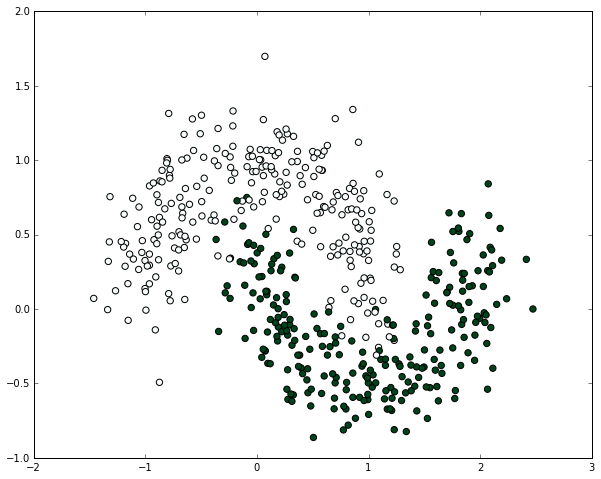

In [2]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
Y = []
for i in y:
    if i==0:
        Y.append([1,0])
    else:
        Y.append([0,1])
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import keras 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation


Using TensorFlow backend.


In [36]:
nb_classes = 2
nb_hidden = 50
nb_dim = 2

model = Sequential()
model.add(Dense(nb_hidden, input_shape=(nb_dim,)))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy')


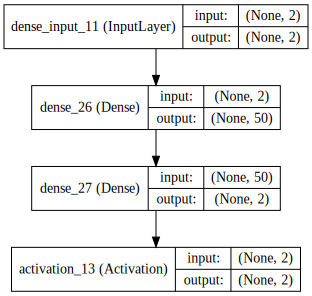

In [37]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [38]:
var_optimzied(model)

252


252

In [40]:

model.fit(np.array(X), np.array(Y), nb_epoch=1000)

Epoch 1/1000
500/500 [==============================] - 0s - loss: 0.3093     
Epoch 2/1000
500/500 [==============================] - 0s - loss: 0.3093     
Epoch 3/1000
500/500 [==============================] - 0s - loss: 0.3093     
Epoch 4/1000
500/500 [==============================] - 0s - loss: 0.3092     
Epoch 5/1000
500/500 [==============================] - 0s - loss: 0.3091     
Epoch 6/1000
500/500 [==============================] - 0s - loss: 0.3092     
Epoch 7/1000
500/500 [==============================] - 0s - loss: 0.3092     
Epoch 8/1000
500/500 [==============================] - 0s - loss: 0.3092     
Epoch 9/1000
500/500 [==============================] - 0s - loss: 0.3090     
Epoch 10/1000
500/500 [==============================] - 0s - loss: 0.3090     
Epoch 11/1000
500/500 [==============================] - 0s - loss: 0.3092     
Epoch 12/1000
500/500 [==============================] - 0s - loss: 0.3090     
Epoch 13/1000
500/500 [==========================

In [20]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    #plt.plot(Z)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

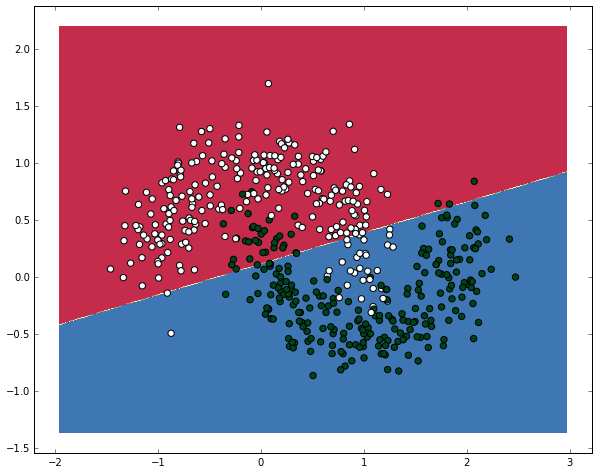

In [26]:
plot_decision_boundary(model)

### Number of variables optimized ?

In [21]:
import keras.backend as K

def var_optimzied(model):
    total = 0
    for i in model.trainable_weights:
        #print K.int_shape(i), len(K.int_shape(i))
        if len(K.int_shape(i))>1:
            total += K.int_shape(i)[0]*K.int_shape(i)[1]
        else:
            total += K.int_shape(i)[0]
    print total
    return total

## Theoretical Motivations for depth

>Universal approximation theorem states[1] that a feed-forward network with a single hidden layer containing a finite number of neurons (i.e., a multilayer perceptron), can approximate continuous functions on compact subsets of $\mathbb{R}^n$, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters.

[1] - Approximation Capabilities of Multilayer Feedforward Networks - Kurt Hornik 1991

In [42]:
nb_classes = 2
nb_hidden = 50
nb_dim = 2

model = Sequential()
model.add(Dense(nb_hidden, input_shape=(nb_dim,)))
## new layer
model.add(Dense(nb_hidden, input_shape=(nb_hidden,)))
##
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
#print var_optimzied(model)
model.fit(np.array(X), np.array(Y), nb_epoch=200)


Epoch 1/200
500/500 [==============================] - 0s - loss: 0.5997     
Epoch 2/200
500/500 [==============================] - 0s - loss: 0.4670     
Epoch 3/200
500/500 [==============================] - 0s - loss: 0.4135     
Epoch 4/200
500/500 [==============================] - 0s - loss: 0.3849     
Epoch 5/200
500/500 [==============================] - 0s - loss: 0.3672     
Epoch 6/200
500/500 [==============================] - 0s - loss: 0.3553     
Epoch 7/200
500/500 [==============================] - 0s - loss: 0.3468     
Epoch 8/200
500/500 [==============================] - 0s - loss: 0.3406     
Epoch 9/200
500/500 [==============================] - 0s - loss: 0.3357     
Epoch 10/200
500/500 [==============================] - 0s - loss: 0.3320     
Epoch 11/200
500/500 [==============================] - 0s - loss: 0.3288     
Epoch 12/200
500/500 [==============================] - 0s - loss: 0.3263     
Epoch 13/200
500/500 [==============================] - 0s - 

In [43]:
var_optimzied(model)

2802


2802

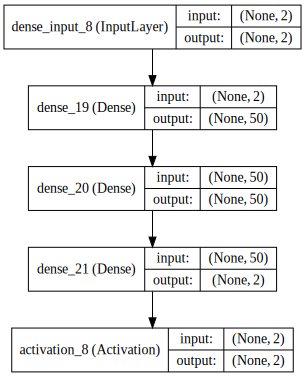

In [30]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

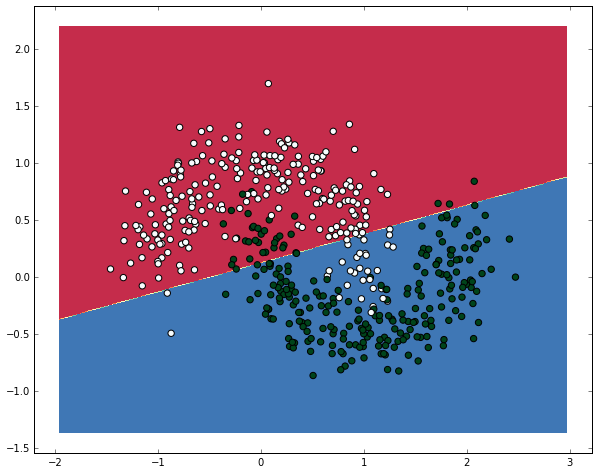

In [29]:
plot_decision_boundary(model)

##Activation Function
In machine learning, the vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the gradient of the error function with respect to the current weight in each iteration of training. Traditional activation functions such as the hyperbolic tangent or ReLu.

Based on this rate code interpretation, we model the firing rate of the neuron with an activation function ff, which represents the frequency of the spikes along the axon. Historically, a common choice of activation function is the sigmoid function σ.

The Rectified Linear Unit has become very popular in the last few years. It computes the function f(x)=max(0,x). In other words, the activation is simply thresholded at zero (see image above on the left). There are several pros and cons to using the ReLUs:

In [44]:
nb_classes = 2
nb_hidden = 50
nb_dim = 2

model = Sequential()
model.add(Dense(nb_hidden, input_shape=(nb_dim,)))
## new layer
model.add(Activation('relu'))
model.add(Dense(nb_hidden, input_shape=(nb_hidden,)))
model.add(Activation('relu'))
##
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
#print var_optimzied(model)
model.fit(np.array(X), np.array(Y), nb_epoch=200)


Epoch 1/200
500/500 [==============================] - 0s - loss: 0.6205     
Epoch 2/200
500/500 [==============================] - 0s - loss: 0.5952     
Epoch 3/200
500/500 [==============================] - 0s - loss: 0.5727     
Epoch 4/200
500/500 [==============================] - 0s - loss: 0.5522     
Epoch 5/200
500/500 [==============================] - 0s - loss: 0.5330     
Epoch 6/200
500/500 [==============================] - 0s - loss: 0.5152     
Epoch 7/200
500/500 [==============================] - 0s - loss: 0.4986     
Epoch 8/200
500/500 [==============================] - 0s - loss: 0.4831     
Epoch 9/200
500/500 [==============================] - 0s - loss: 0.4683     
Epoch 10/200
500/500 [==============================] - 0s - loss: 0.4547     
Epoch 11/200
500/500 [==============================] - 0s - loss: 0.4420     
Epoch 12/200
500/500 [==============================] - 0s - loss: 0.4308     
Epoch 13/200
500/500 [==============================] - 0s - 

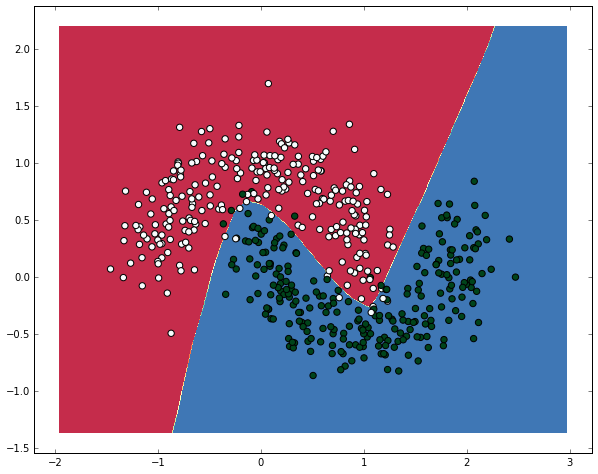

In [32]:
plot_decision_boundary(model)